# EWMA and ETS Decomposition

##  EWMAvExponentially Weighted Moving Average

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [5]:
airline = pd.read_csv("/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Finance_Files/08-Time-Series-Analysis/airline_passengers.csv", index_col='Month')

In [6]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [7]:
# drop any missing values
airline.dropna(inplace=True)

In [8]:
# parse the index to datetime
airline.index = pd.to_datetime(airline.index)

In [9]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [10]:
# check the data type of the index
airline.index.dtype

dtype('<M8[ns]')

In [11]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [12]:
# crate a new column for the 6 month moving average clolumn
airline['6_MA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [13]:
# create a new column for the 12 month moving average column
airline['12_MA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

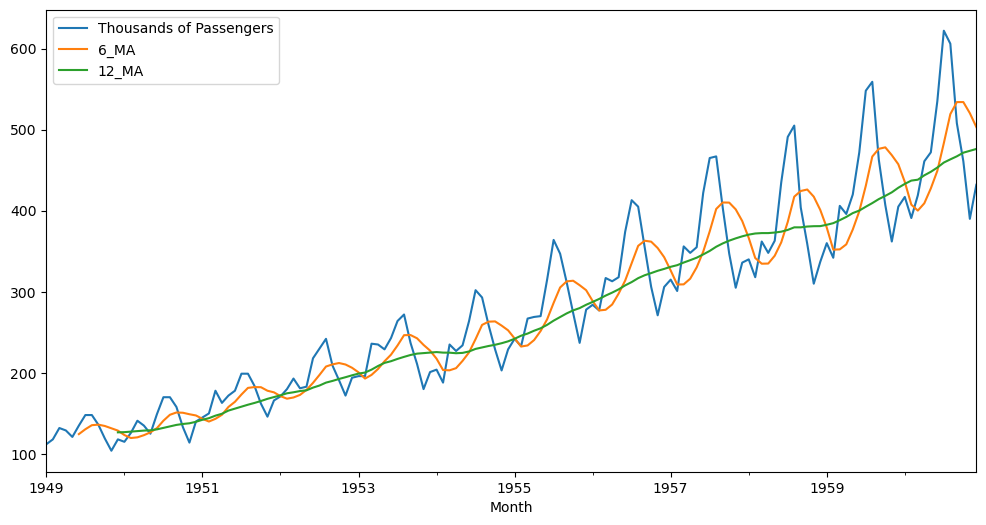

In [15]:
airline.plot(figsize=(12,6))
plt.show()

# EWMA Exponential Weighted Moving Average

In [16]:
# new column for EWMA with a span of 12 months
airline['EWMA_12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

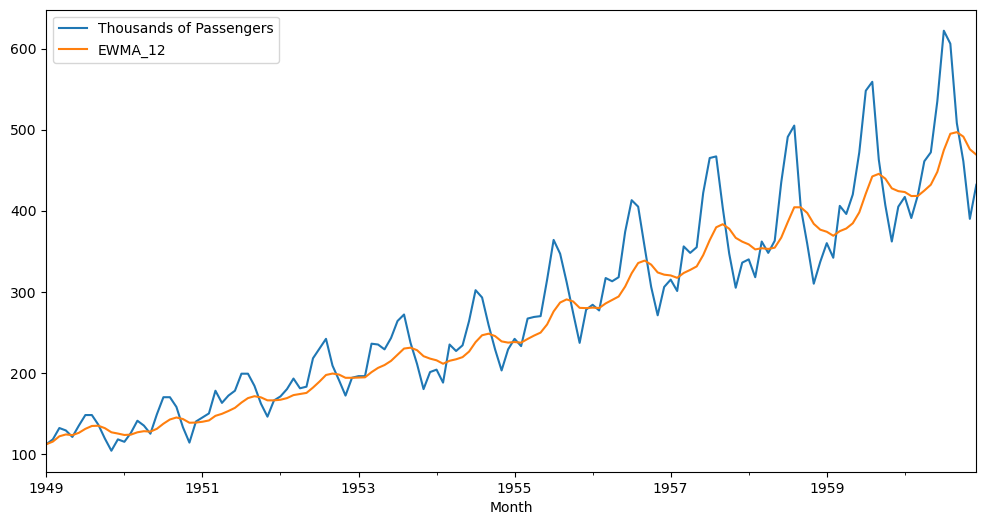

In [17]:
# plot the EWMA vs the original data
airline[['Thousands of Passengers', 'EWMA_12']].plot(figsize=(12,6))
plt.show()

## ETS Decomposition - Error, Trend and Seasonality

In [20]:
airline = pd.read_csv("/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Finance_Files/08-Time-Series-Analysis/airline_passengers.csv", index_col='Month')

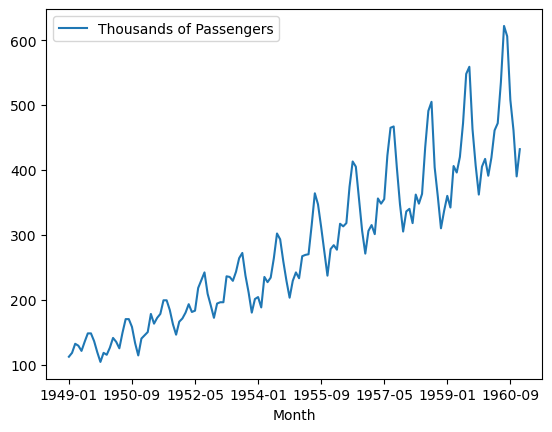

In [21]:
airline.plot()
plt.show()

In [23]:
# drop any missing values
airline.dropna(inplace=True)

In [24]:
# set index to datetime
airline.index = pd.to_datetime(airline.index)

In [25]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Decompose the data into the Error, Trend and Seasonality components

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

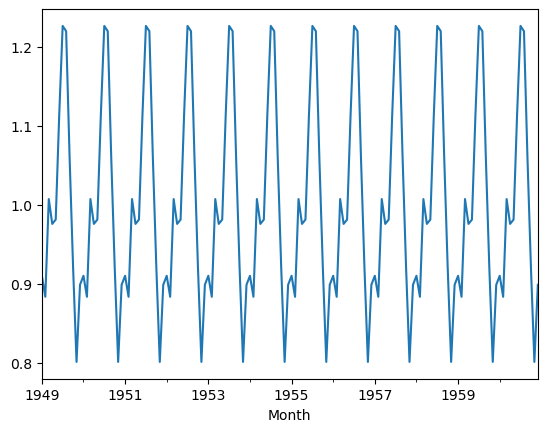

In [ ]:
# Plot the seasonal component
result.seasonal.plot()
plt.show()

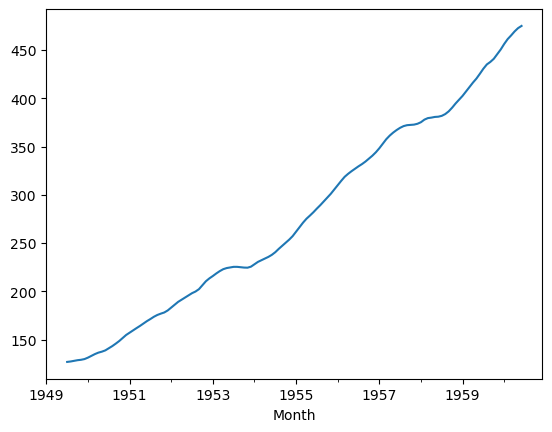

In [29]:
# plor the trend component
result.trend.plot()
plt.show()

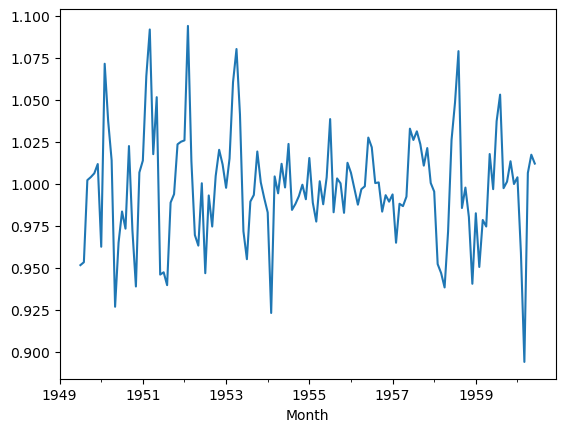

In [30]:
# plot teh residual component
result.resid.plot()
plt.show()

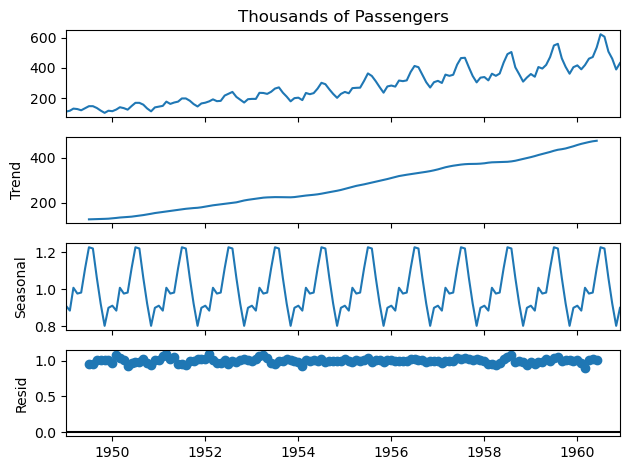

In [31]:
# plot everything together
result.plot()
plt.show()